In [126]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [127]:
bostan = load_boston()

In [128]:
bostan.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [129]:
bostan.data.shape

(506, 13)

In [130]:
bostan.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [131]:
data = pd.DataFrame(bostan.data,columns=bostan.feature_names) # creating data frame

In [132]:
data['price'] = bostan.target # adding target future to data frame

In [133]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [135]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [136]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [137]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =123)

In [138]:
#objective parameter determined which loss funtion to use linear or logistics

xgb_model = xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha = 10, n_estimators=10)

In [139]:
# training the model
xgb_model.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [140]:
# predicting output on test dataset
prdict  = xgb_model.predict(X_test)

In [141]:
np.sqrt(mean_squared_error(y_test, prdict))

9.831099170897444

In [142]:
#rmse is 3.5 per 1000

In [143]:
#cross validation to imporve rmse value
Dmat = xgb.DMatrix(X,y) # dmatix is a internal data structure that is used by XGboost which optimisied for both memory and training speed
param = {"objective":'reg:linear',"colsample_bytree":0.3,'learning_rate':0.1,"max_depth":5,"alpha":10}
xgb_cv_model = xgb.cv(params=param, dtrain=Dmat,num_boost_round=50,early_stopping_rounds=10,metrics='rmse',as_pandas=True,seed=123)

[14:19:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[14:19:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:19:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:19:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[14:19:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[14:19:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[14:19:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end,

[14:19:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[14:19:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[14:19:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[14:19:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[14:19:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[14:19:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[14:19:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [157]:
xgb_cv_model

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.746917,0.031586,21.765235,0.029251
1,19.777912,0.058719,19.796670,0.043442
2,18.014730,0.052289,18.050408,0.068405
3,16.440724,0.076892,16.532230,0.089925
4,15.001958,0.073236,15.163680,0.072632
5,13.742879,0.087198,13.902679,0.092359
6,12.587469,0.081690,12.791089,0.066798
7,11.631953,0.076842,11.866631,0.072221
8,10.742024,0.063940,11.007779,0.037471
9,9.891568,0.047589,10.201297,0.045659


In [173]:
# now rmse is 4.0 per 1000 so rms value reduce using cross validation

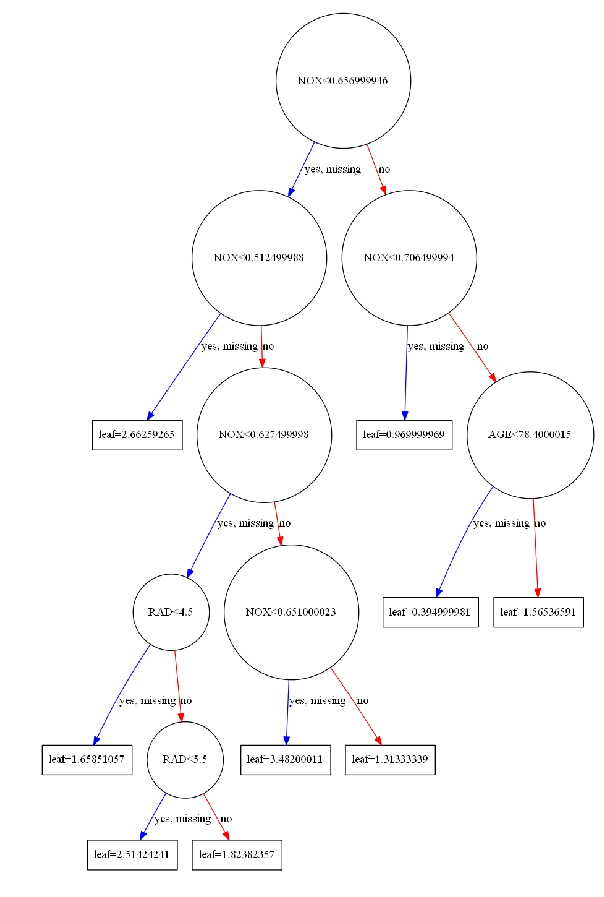

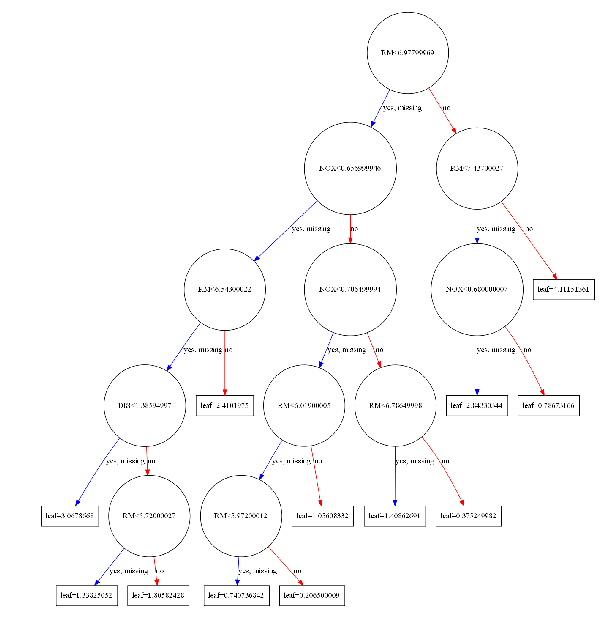

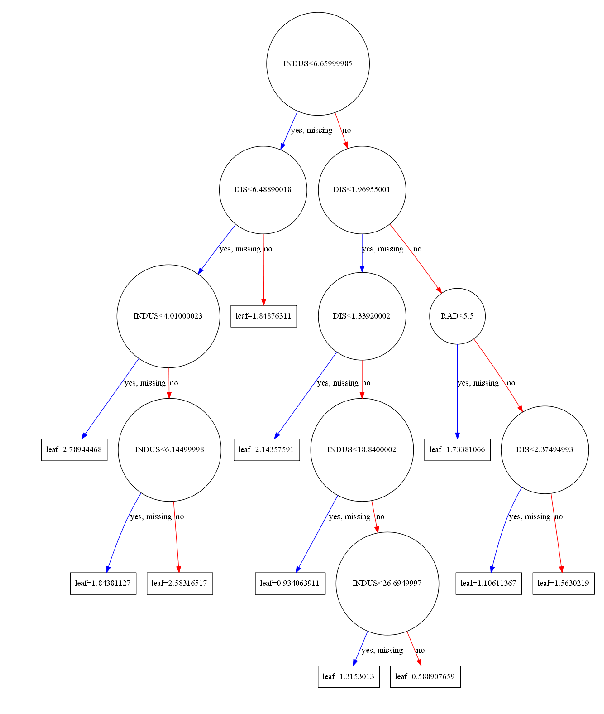

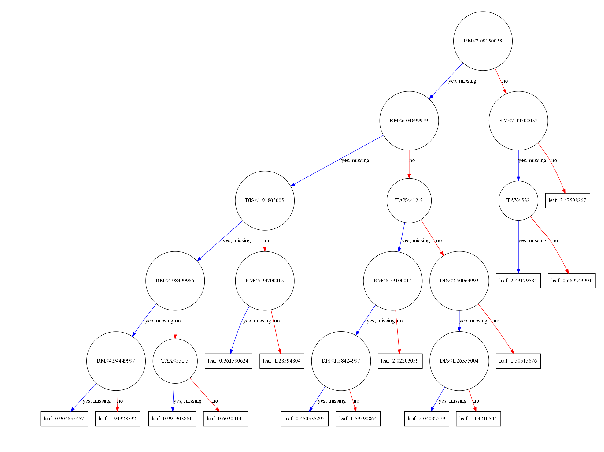

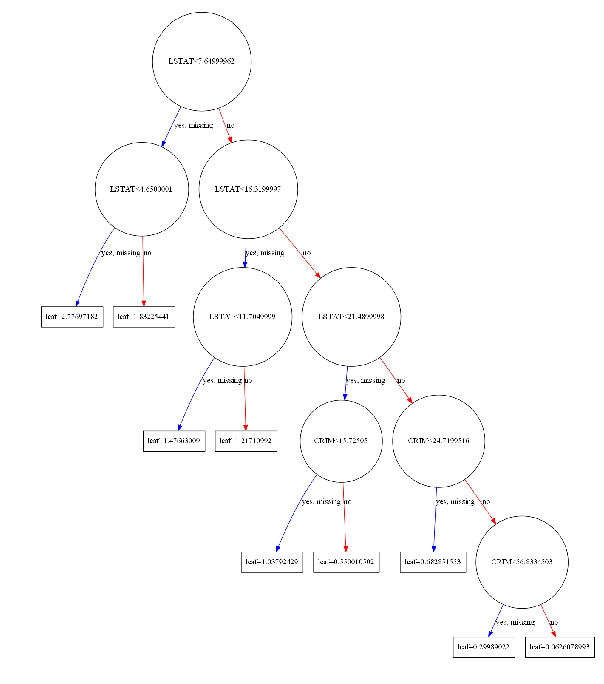

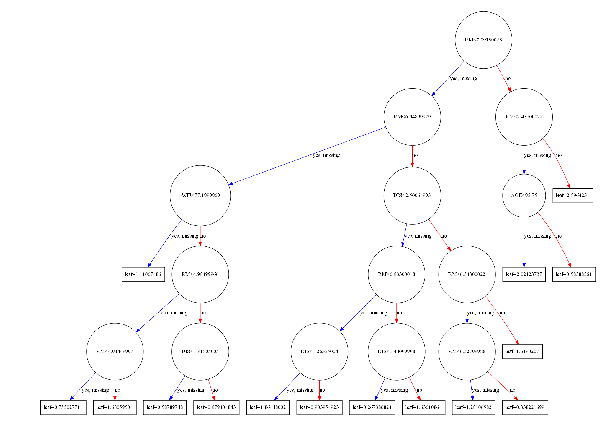

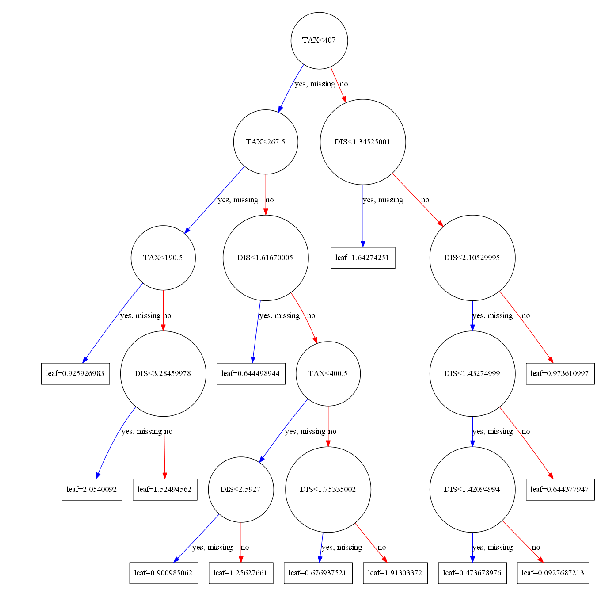

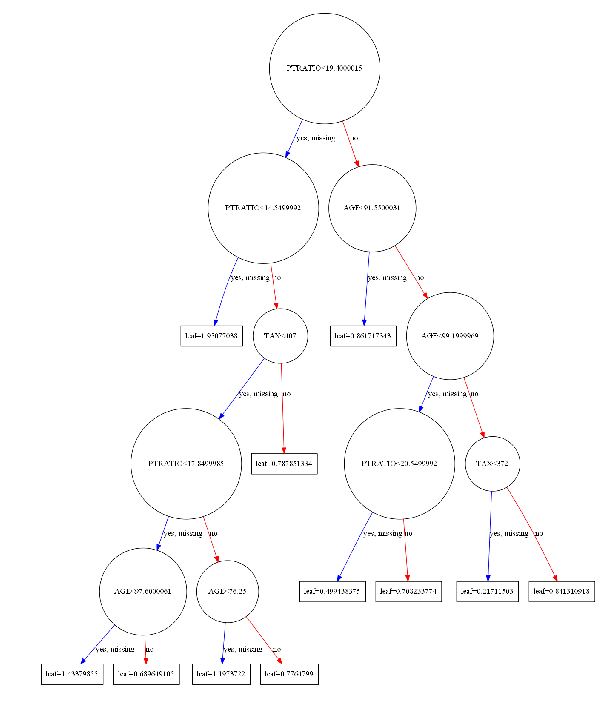

In [191]:
#plotting decision tree
# visualizing result of xgb boost model not cv model because cv model is model but it is result 
for i in range(8):
    xgb.plot_tree(xgb_model, num_trees=i)
    fig = plt.gcf() #get current frame
    fig.set_size_inches(10,20)
    plt.show()

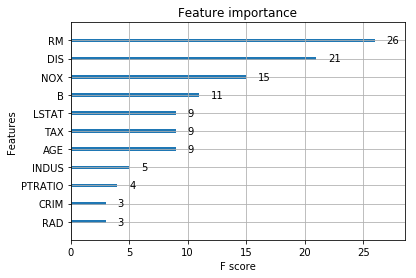

In [192]:
# visualize your xgboost using importance of feature i.e counting number of times each feature is split on all trees, then visulaize result as bar garph
xgb.plot_importance(xgb_model)